In [13]:
%%capture 

!git clone  https://github.com/Amerikanosam/ChIPseq-Analysis.git

In [14]:
import sys
sys.path.insert(0,'/content/ChIPseq-Analysis')


In [15]:
import analysistool
import seqmodel
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import random

In [4]:
from google.colab import drive
# mount drive on colab
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
filepath="drive//MyDrive//MastersProject//data"

Chromosome 1 data

In [6]:
chr1del=pd.read_csv(filepath+"//pombe_origins_rif1d_chrI.csv")
chr1wt = pd.read_csv(filepath+"//pombe_origins_wt_chrI.csv")
chr1chip = pd.read_csv(filepath+"//pombe_rif1_chip_chrI.csv")
chr1peaks = pd.read_csv(filepath+"//pombe_rif1_peakcaller_chrI.csv")

Chromosome 2 data

In [7]:
chr2del=pd.read_csv(filepath+"//pombe_origins_rif1d_chrII.csv")
chr2wt = pd.read_csv(filepath+"//pombe_origins_wt_chrII.csv")
chr2chip = pd.read_csv(filepath+"//pombe_rif1_chip_chrII.csv")
chr2peaks = pd.read_csv(filepath+"//pombe_rif1_peakcaller_chrII.csv")

Chromosome 3 data

In [8]:
chr3del=pd.read_csv(filepath+"//pombe_origins_rif1d_chrIII.csv")
chr3wt = pd.read_csv(filepath+"//pombe_origins_wt_chrIII.csv")
chr3chip = pd.read_csv(filepath+"//pombe_rif1_chip_chrIII.csv")
chr3peaks = pd.read_csv(filepath+"//pombe_rif1_peakcaller_chrIII.csv")

###Preprocessing

In [11]:
# origin efficiency thresholds
threshdel=0.2
threshwt = 0.2
dethresh = 0.1
lowthresh = 0

In [ ]:
chr1analysis = analysistool.analysistool(chr1del,chr1wt)


In [12]:
chr1analysis = analysistool.analysistool(chr1del,chr1wt)
# thresholded puseq data
chr1delcut,chr1wtcut = chr1analysis.thresholding(threshdel,threshwt)
# compute difference in efficiencies 
chr1deldiff = chr1analysis.compute_defficiency(chr1delcut,chr1wtcut)
# label each position in chip data with binding site
# used to segment the noise sequences
chr1chip = chr1analysis.labelchip(chr1chip,chr1delcut)


/content/ChIPseq-Analysis/analysistool.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deldf["deff"] = 0
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [16]:
chr2analysis = analysistool.analysistool(chr2del,chr2wt)
chr2delcut,chr2wtcut = chr2analysis.thresholding(threshdel,threshwt)
chr2deldiff = chr2analysis.compute_defficiency(chr2delcut,chr2wtcut)
chr2chip = chr2analysis.labelchip(chr2chip,chr2delcut)


/content/ChIPseq-Analysis/analysistool.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deldf["deff"] = 0
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [17]:
chr3analysis = analysistool.analysistool(chr3del,chr3wt)
chr3delcut,chr3wtcut = chr3analysis.thresholding(threshdel,threshwt)
chr3deldiff = chr3analysis.compute_defficiency(chr3delcut,chr3wtcut)
chr3chip = chr3analysis.labelchip(chr3chip,chr3delcut)

/content/ChIPseq-Analysis/analysistool.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deldf["deff"] = 0
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [18]:
# get dataset,labels,each sequence position on genome and origin near binding site
chr1data, chr1labels,chr1positions,chr1bindingsites  = chr1analysis.createdataset(dethresh,lowthresh,chr1deldiff, chr1wt,chr1chip)
chr2data, chr2labels, chr2positions, chr2bindingsites = chr2analysis.createdataset(dethresh,lowthresh,chr2deldiff,chr2wt,chr2chip)
chr3data, chr3labels, chr3positions, chr3bindingsites = chr3analysis.createdataset(dethresh,lowthresh,chr3deldiff,chr3wt,chr3chip)


190
190
162
162
82
82


In [ ]:
chr1data, chr1labels,chr1positions,chr1bindingsites  = chr1analysis.createdataset(dethresh,lowthresh,chr1deldiff, chr1wt,chr1chip)


190
190


In [23]:
chr1set.shape

(380, 1000, 1)

In [25]:
# create additional dimension
chr1set =np.stack(chr1data)
# change dimensions
chr1set = chr1set.reshape(chr1set.shape[0],chr1set.shape[1],1)
# zip dataset for chromosome 1
chr1dataset = list(zip(chr1data,np.array(chr1labels,dtype=np.float32),chr1positions))

# chromosome 2
chr2set =np.stack(chr2data,axis=0)
chr2set = chr2set.reshape(chr2set.shape[0],chr2set.shape[1],1)
chr2dataset = list(zip(chr2data,np.array(chr2labels,dtype=np.float32),chr2positions))

# chromosome 3
chr3set =np.stack(chr3data,axis=0)
chr3dataset = list(zip(chr3data,np.array(chr3labels,dtype=np.float32),chr3positions))

dataset = chr1dataset + chr2dataset + chr3dataset

# random shuffle dataset
random.seed(8)
random.shuffle(dataset)

# partition dataset into training, validation and testing
# 60/20/20
traindata = dataset[:round(len(dataset)*0.6)]
valdata = dataset[round(len(dataset)*0.6):round(len(dataset)*0.8)]
testdata = dataset[round(len(dataset)*0.8):]

trainset = [i[0] for i in traindata]
trainlabels = [i[1] for i in traindata]
trainpos = [i[2] for i in traindata]

In [27]:
vallabels = [i[1] for i in valdata]
valset = [i[0] for i in valdata ]
valpos = [i[2] for i in valdata]

In [28]:
model = seqmodel.seqmodel(1000)

In [29]:
model.build_model()

In [30]:
history = model.trainmodel(10,16,np.array(trainset),np.array(trainlabels),np.array(valset),np.array(vallabels))

Epoch 1/10
33/33 [==============================] - 110s 2s/step - loss: 0.6812 - accuracy: 0.5893 - val_loss: 0.6585 - val_accuracy: 0.7052
Epoch 2/10
33/33 [==============================] - 80s 2s/step - loss: 0.6524 - accuracy: 0.7121 - val_loss: 0.6270 - val_accuracy: 0.7688
Epoch 3/10
33/33 [==============================] - 80s 2s/step - loss: 0.6305 - accuracy: 0.7620 - val_loss: 0.6007 - val_accuracy: 0.7977
Epoch 4/10
33/33 [==============================] - 81s 2s/step - loss: 0.6086 - accuracy: 0.7678 - val_loss: 0.5767 - val_accuracy: 0.8555
Epoch 5/10
33/33 [==============================] - 81s 2s/step - loss: 0.5909 - accuracy: 0.8023 - val_loss: 0.5534 - val_accuracy: 0.8555
Epoch 6/10
33/33 [==============================] - 81s 2s/step - loss: 0.5641 - accuracy: 0.8177 - val_loss: 0.5335 - val_accuracy: 0.7861
Epoch 7/10
33/33 [==============================] - 81s 2s/step - loss: 0.5437 - accuracy: 0.8196 - val_loss: 0.5114 - val_accuracy: 0.8382
Epoch 8/10
33/33 [=

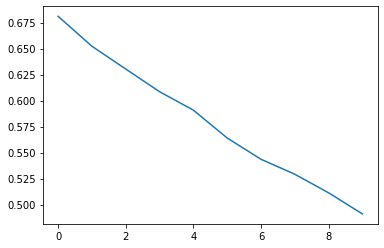

In [33]:
plt.plot(history.history['loss'])